In [1]:
import pandas as pd
import time
import numpy as np
import re
import pickle
import string, unicodedata
from unidecode import unidecode

## Load Data

In [3]:
#data = pd.read_excel('data/data_komentar_clean_1.xlsx', sheet_name = 'Sheet1') # data awl
data = pd.read_excel('seleksi_data_latih/hasil_seleksi_.xlsx') #imbang
#data = pd.read_excel('data/data_komentar_clean_1.xlsx', sheet_name = 'imb_7525')
komentar = data['komentar'].tolist()
label = data['label'].tolist()

In [4]:
len(komentar)

63113

In [5]:
# #proses membuat vocabularry
# from sklearn.feature_extraction.text import TfidfVectorizer
# kosa_kata = set()

# ###seleksi fitur
# kk = TfidfVectorizer()
# kk.fit_transform(komentar)
# kosa_kata = kk.get_feature_names()
# print(len(kosa_kata))
# with open('data/features_balance_48754.txt', 'w') as f:
#     for item in kosa_kata:
#         f.write("%s\n" % item)

## Proses TF-IDF

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(komentar)
print(tfidf_matrix.shape)
# X = tfidf_matrix.toarray()
# X = np.squeeze(np.asarray(tfidf_matrix))
Y = np.array(label) #labet tiap (komentat [spam dan bukan spam])/ 1:0
y = Y
X = tfidf_matrix

(63113, 48754)


In [9]:
tfidf_matrix

<63113x48754 sparse matrix of type '<class 'numpy.float64'>'
	with 521042 stored elements in Compressed Sparse Row format>

In [16]:
# from sklearn.feature_extraction.text import TfidfVectorizer
      
# tfidf = TfidfVectorizer() #membuat model tf-idf
# ##Membuat Matrix TF-IDF
# tfidf_matrix = tfidf.fit_transform(komentar) #melakukan fit data -> seluruh data komentar
# print(tfidf_matrix.shape)
# X = tfidf_matrix.toarray() #merubah tipe data ke array
# #X= tfidf_matrix
# Y = np.array(label) #labet tiap (komentat [spam dan bukan spam])/ 1:0
# y = Y

## Proses Pemodelan

In [10]:
#Import Library
import numpy as np
# from sklearn import svm
from sklearn.naive_bayes import ComplementNB

# import pylab as pl
# from sklearn.svm import SVC

# Mencari parameter terbaik

## Proposes percobaan untuk masing masing parameter SVM

In [11]:
# K = 10 #pembagian data uji dan data latih
# from sklearn.model_selection import KFold
# from sklearn.metrics import accuracy_score

# kf = KFold(n_splits=K) 
# C_range = np.arange(1.7,2.3,0.1)
# gamma_range = np.arange(0.5,1.1, 0.1)

# C_range_ = []
# gamma_range_ = []
# rerata_akurasi_svm = []
# rerata_waktu_eksekusi = []
# rerata_waktu_prediksi = []
# count=0
# for i in range(len(C_range)):
#     for j in range(len(gamma_range)):
#         C = C_range[i]
#         gamma = gamma_range[j]
#         akurasi_svm = []
#         waktu_eksekusi = []
#         waktu_prediksi = []
#         cSVM = svm.SVC(kernel='rbf', gamma=gamma, C=C) #model
#         for train_index, test_index in kf.split(X):
#             #membagi data latih dan data uji
#             X_train, X_test = X[train_index], X[test_index] #pembagian data latih
#             y_train, y_test = y[train_index], y[test_index]
            
#             start = time.time()
#             #Melatih Model
#             cSVM = cSVM.fit(X_train, y_train) #SVM
#             end = time.time()
#             waktu_eksekusi.append(end-start)
            
#             #proses prediksi
#             start = time.time()
#             P_SVM = cSVM.predict(X_test)
#             end = time.time()
#             waktu_prediksi.append(end-start)
            
#             akurasi_svm.append(accuracy_score(y_test, P_SVM))
#         print("iterasi ke-", count)
#         C_range_.append(C)
#         gamma_range_.append(gamma)
        
#         rr = sum(akurasi_svm)/len(akurasi_svm)
#         rerata_akurasi_svm.append(rr)
#         count+=1
        
#         rerata_waktu_eksekusi.append(sum(waktu_eksekusi)/len(waktu_eksekusi))
#         rerata_waktu_prediksi.append(sum(waktu_prediksi)/len(waktu_prediksi))
        
#         #Menampilkan hasil 
#         print("-"*30)
#         print("C     : ", C)
#         print("gamma : ", gamma)
#         print("-"*20)
#         print("Rata-rata Akurasi SVM : %0.2f" % (sum(akurasi_svm)/len(akurasi_svm)))
#         print("Rata-rata Waktu eksekusi SVM: %0.2f" % (sum(waktu_eksekusi)/len(waktu_eksekusi)))
#         print("Rata-rata Waktu prediksi  SVM: %0.2f" % (sum(waktu_prediksi)/len(waktu_prediksi)))
#         print("="*30)
    
# #proses mencari parameter dan akurasi terbaik
# x = max(rerata_akurasi_svm)
# #al = list(alpha_range)
# index = rerata_akurasi_svm.index(x)
# round(gamma_range_[index],2)
# print("---------------------------")
# print("gamma terbaik adalah :", round(gamma_range_[index],2))
# print("    C terbaik adalah :", round(C_range_[index],2))
# print("             Akurasi :", round(x, 2))

# #MENYIMPAN HASIL
# dict_komentar  = {"gamma":gamma_range_,"c":C_range_, "akurasi":rerata_akurasi_svm, "waktu eksekusi":rerata_waktu_eksekusi, "waktu prediksi":rerata_waktu_prediksi}
# df = pd.DataFrame(dict_komentar,columns = ["gamma", 'c', "akurasi", "waktu eksekusi", "waktu prediksi"])
# writer = pd.ExcelWriter('data/parameter/parameter-akurasi-svm.xlsx', engine='xlsxwriter')
# df.to_excel(writer, sheet_name='svm-parameter')
# #Close the Pandas Excel writer and output the Excel file.
# writer.save()

# Mencari Parameter Alpha

In [12]:
K = 10 #pembagian data uji dan data latih

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score #, precision_score, recall_score
kf= KFold(n_splits=K) 
skf = StratifiedKFold(n_splits=K,random_state=2, shuffle=True)
skf
# from sklearn.metrics import accuracy_score#, precision_score

# kf = KFold(n_splits=K)

# alpha_range = np.arange(0.1,2.01,0.01)
# alpha_range = np.arange(2.0,4.01,0.01)
alpha_range = np.arange(0.1,30.1,0.1)

rerata_akurasi_cnb = []
rerata_waktu_eksekusi = []
rerata_waktu_prediksi = []

count=0
for i in range(len(alpha_range)): #melakukan interasi sebanyak data parameter C
    alpha = alpha_range[i]
    akurasi_cnb = []
    comNB = ComplementNB(alpha = alpha) #model
    waktu_eksekusi = []
    waktu_prediksi = []
    tic = time.perf_counter()
#     for train_index, test_index in kf.split(X): 
    for train_index, test_index in skf.split(X, Y):
            #membagi data latih dan data uji
        X_train, X_test = X[train_index], X[test_index] #pembagian data latih
        y_train, y_test = y[train_index], y[test_index]
    
        #Melatih Model 
        mCNB = comNB.fit(X_train, y_train) 
            
        #proses prediksi
        P_CNB = mCNB.predict(X_test)
        
        
        start = time.time()
        #Melatih Model
        mCNB = comNB.fit(X_train, y_train)  #SVM
        end = time.time()
        waktu_eksekusi.append(end-start)
            
        #proses prediksi
        start = time.time()
        P_CNB = mCNB.predict(X_test)
        end = time.time()
        waktu_prediksi.append(end-start)
        
        
        akurasi_cnb.append(accuracy_score(y_test, P_CNB))
        print(".", end="")
    toc = time.perf_counter()
#     print("iterasi ke-", count)
        
    rr = sum(akurasi_cnb)/len(akurasi_cnb)
    rerata_akurasi_cnb.append(rr)
    
    rerata_waktu_eksekusi.append(sum(waktu_eksekusi)/len(waktu_eksekusi))
    rerata_waktu_prediksi.append(sum(waktu_prediksi)/len(waktu_prediksi))
    count+=1
    #Menampilkan hasil akhir
#     print("---------------------------------")
#     print("alpha : ", alpha)
#     print("----------------------------")
#     print("Rata-rata Akurasi cnb: %0.2f" % (sum(akurasi_cnb)/len(akurasi_cnb)))
#     print("---------------------------------", toc-tic, "second")
    print("")
    
#proses mencari parameter dan akurasi terbaik
x = max(rerata_akurasi_cnb)
index = rerata_akurasi_cnb.index(x)
print("---------------------------")
print("alpha terbaik adalah :", round(alpha_range[index],2))
print("             Akurasi :", round(x, 2))

round_akurasi_cnb = []
for i in rerata_akurasi_cnb:
    round_akurasi_cnb.append(round(i,2))
dict_komentar  = {"alpha":alpha_range,"akurasi":rerata_akurasi_cnb, "Akurasi round":round_akurasi_cnb, "waktu eksekusi":rerata_waktu_eksekusi, "waktu prediksi":rerata_waktu_prediksi}
df = pd.DataFrame(dict_komentar,columns = ["alpha","akurasi","Akurasi round", "waktu eksekusi", "waktu prediksi"])
writer = pd.ExcelWriter('data/parameter-akurasi-cnb_fix.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='cnb-parameter-cnb')

#menyimpan file
writer.save()

..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........
..........

In [26]:
df['alpha']

0       0.1
1       0.2
2       0.3
3       0.4
4       0.5
5       0.6
6       0.7
7       0.8
8       0.9
9       1.0
10      1.1
11      1.2
12      1.3
13      1.4
14      1.5
15      1.6
16      1.7
17      1.8
18      1.9
19      2.0
20      2.1
21      2.2
22      2.3
23      2.4
24      2.5
25      2.6
26      2.7
27      2.8
28      2.9
29      3.0
       ... 
270    27.1
271    27.2
272    27.3
273    27.4
274    27.5
275    27.6
276    27.7
277    27.8
278    27.9
279    28.0
280    28.1
281    28.2
282    28.3
283    28.4
284    28.5
285    28.6
286    28.7
287    28.8
288    28.9
289    29.0
290    29.1
291    29.2
292    29.3
293    29.4
294    29.5
295    29.6
296    29.7
297    29.8
298    29.9
299    30.0
Name: alpha, Length: 300, dtype: float64

In [14]:
import matplotlib.pyplot as plt

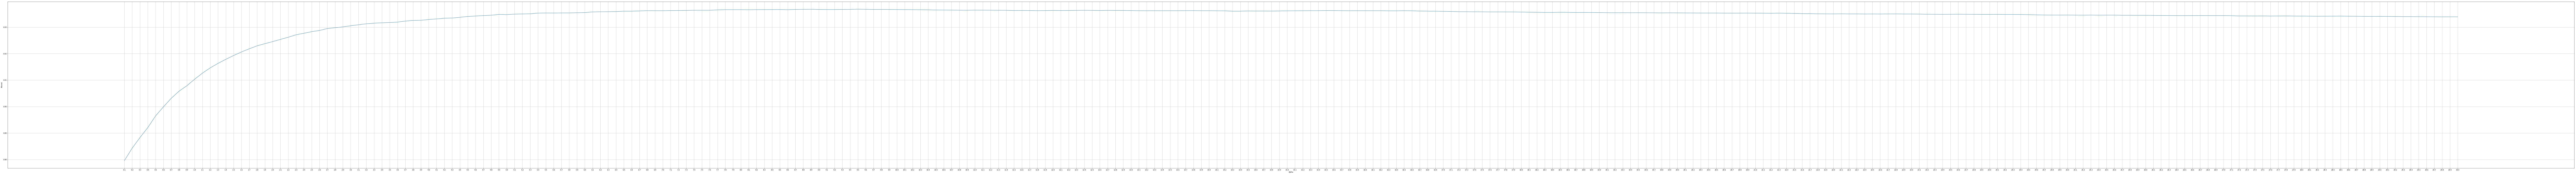

In [46]:
x= df['akurasi'].tolist()
y= df['alpha'].tolist()

plt.figure(figsize=(300,20))
plt.grid(100)
plt.plot(y, x,)
plt.xticks(y)
# plt.xlabel('Akurasi')
plt.ylabel('Akurasi')
plt.xlabel('Aplha')
# for i in range(len(x)):
#     plt.axvline(x[i],0,y[i]) 
plt.show()

In [ ]:
plt.bar(x,y,align='center') # A bar chart
plt.xlabel('Bins')
plt.ylabel('Frequency')
for i in range(len(y)):
    plt.hlines(y[i],0,x[i]) # Here you are drawing the horizontal lines
plt.show()